In [1]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

# Regression

In [ ]:
'''
# Regression Data
# 
# Column 0: height (inches)
# Column 1: weight (pounds)
'''
reg_data = [
   [65.75, 112.99],
   [71.52, 136.49],
   [69.40, 153.03],
   [68.22, 142.34],
   [67.79, 144.30],
   [68.70, 123.30],
   [69.80, 141.49],
   [70.01, 136.46],
   [67.90, 112.37],
   [66.49, 127.45],
]

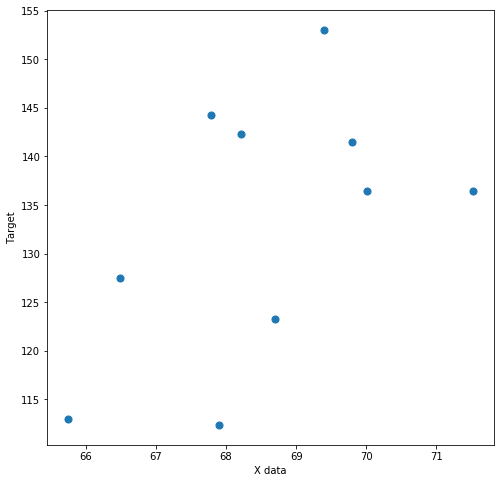

In [33]:
from matplotlib import pyplot as plt
%matplotlib inline

np_reg_data = np.array(reg_data)

plt.figure(figsize=(8,8))
plt.scatter(np_reg_data[:,0], np_reg_data[:,1], s=50)
plt.xlabel('X data')
plt.ylabel('Target')
plt.show()

In [29]:
# Question:
# Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
reg_query = [60]
reg_k_nearest_neighbors, reg_prediction = knn(
    reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
)

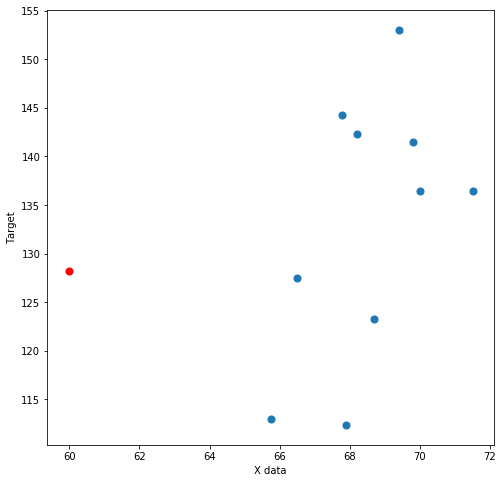

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(np_reg_data[:,0], np_reg_data[:,1], s=50)
plt.scatter(reg_query,[reg_prediction], c='red', s=50)
plt.xlabel('X data')
plt.ylabel('Target')
plt.show()

In [21]:
reg_k_nearest_neighbors, reg_prediction

([(0.25, 0), (0.4899999999999949, 9), (1.7900000000000063, 4)],
 128.24666666666667)

In [19]:
list(enumerate(reg_data))

[(0, [65.75, 112.99]),
 (1, [71.52, 136.49]),
 (2, [69.4, 153.03]),
 (3, [68.22, 142.34]),
 (4, [67.79, 144.3]),
 (5, [68.7, 123.3]),
 (6, [69.8, 141.49]),
 (7, [70.01, 136.46]),
 (8, [67.9, 112.37]),
 (9, [66.49, 127.45])]

# Classification

In [31]:
'''
# Classification Data
# 
# Column 0: age
# Column 1: likes pineapple
'''
clf_data = [
   [22, 1],
   [23, 1],
   [21, 1],
   [18, 1],
   [19, 1],
   [25, 0],
   [27, 0],
   [29, 0],
   [31, 0],
   [45, 0],
]
# Question:
# Given the data we have, does a 33 year old like pineapples on their pizza?
clf_query = [33]
clf_k_nearest_neighbors, clf_prediction = knn(
    clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
)

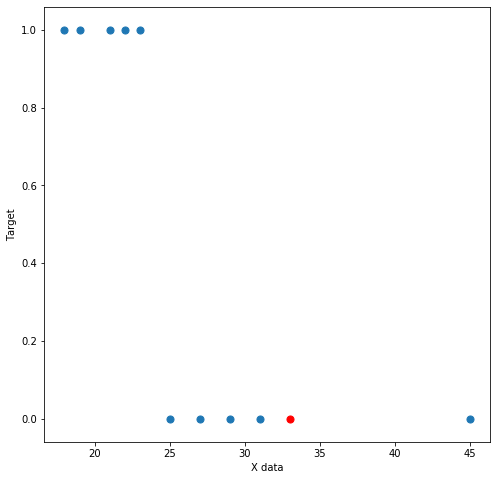

In [35]:
np_clf_data = np.array(clf_data)

plt.figure(figsize=(8,8))
plt.scatter(np_clf_data[:,0], np_clf_data[:,1], s=50)
plt.scatter(clf_query,[clf_prediction], c='red', s=50)
plt.xlabel('X data')
plt.ylabel('Target')
plt.show()